In [ ]:
%matplotlib inline



# **Importing the Required Libraries**

## Fashion Image Classification with Deep Learning

In this project, we will delve into the exciting world of fashion image classification using deep learning techniques. Our goal is to train a model that can accurately classify images of various fashion items.

Fashion image classification has real-life applications that go beyond the realm of coding and technology. For instance, imagine a scenario where you are browsing through an online shopping platform, looking for a specific type of clothing or footwear. Instead of manually searching through thousands of products, an intelligent fashion image classification system can help you find exactly what you're looking for.

By training our model on the Fashion MNIST dataset, which consists of 70,000 grayscale images in 10 different categories, we can teach it to recognize and categorize various fashion items. This enables us to build a system that can automatically tag and categorize fashion products, making it easier for users to search and discover items they love.

With the power of deep learning and the help of the Keras library, we will develop a neural network model that can learn to identify different fashion items and achieve high accuracy on unseen test data. By the end of this project, you will have a solid understanding of how deep learning can be applied to real-life problems, and you'll be equipped with the knowledge to build your own intelligent systems.

Let's dive into the code and explore the world of fashion image classification!
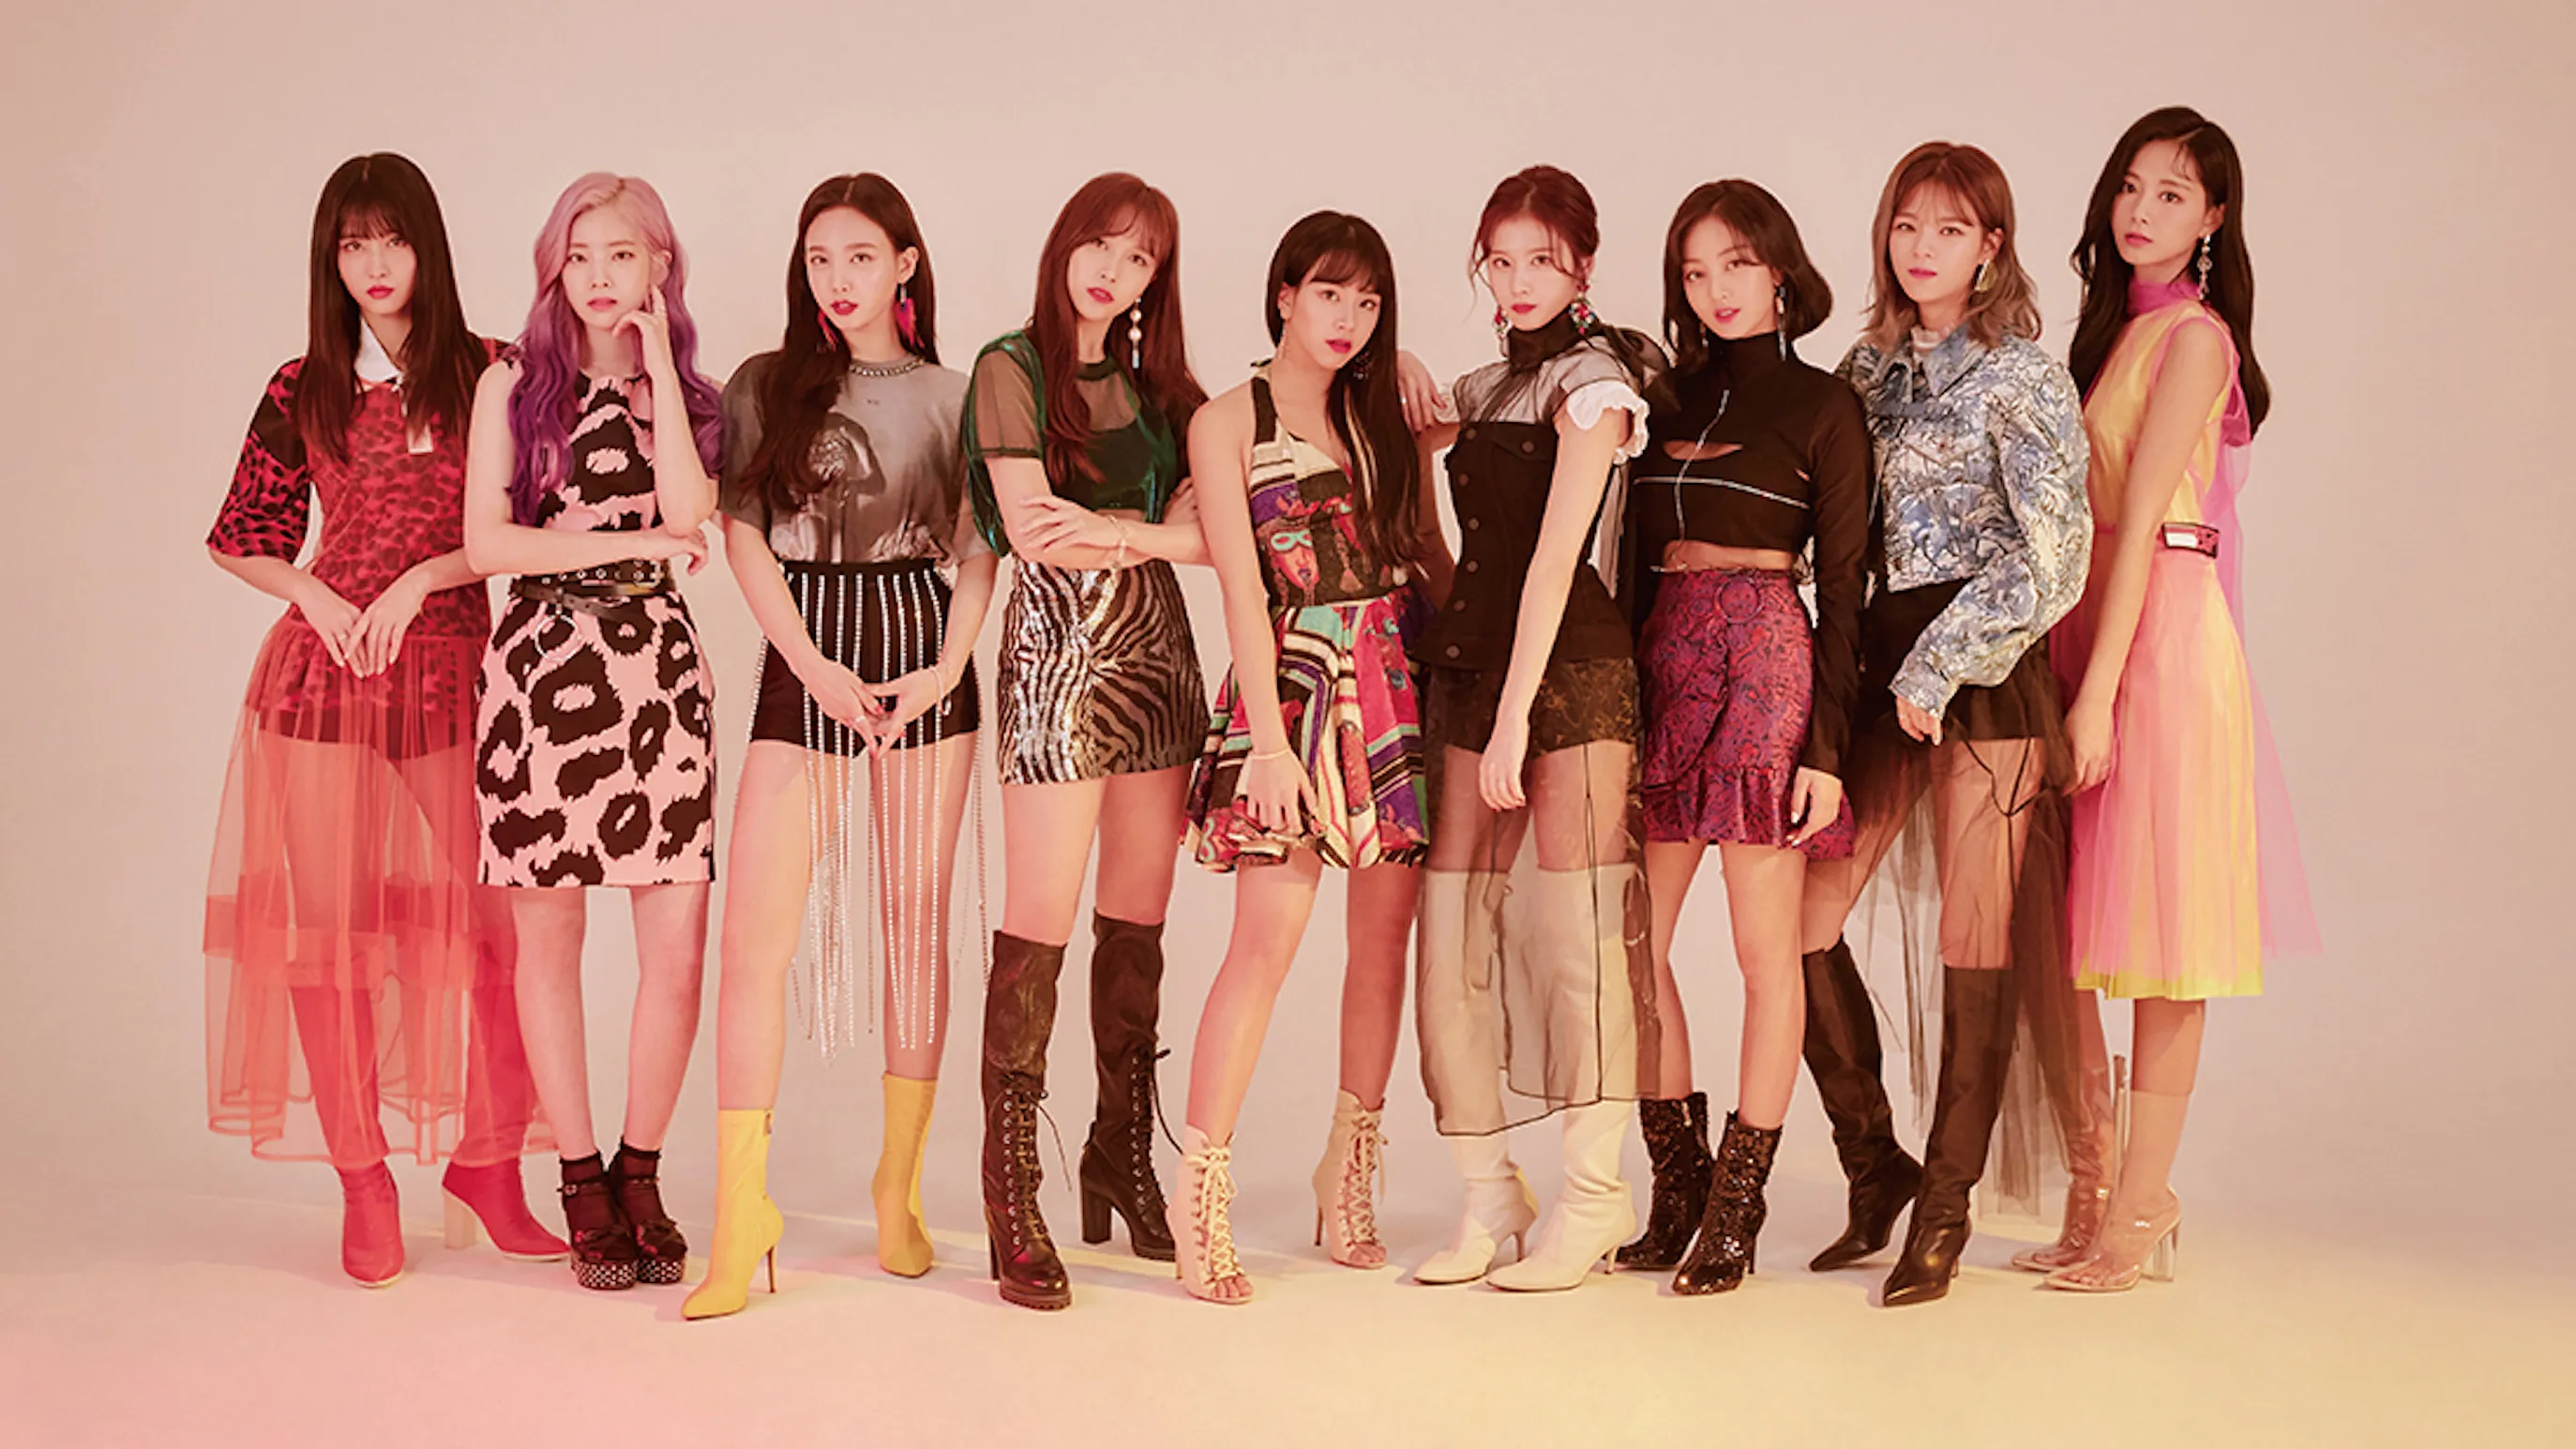

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import fashion_mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In this section, we import the necessary libraries. numpy provides support for mathematical operations, matplotlib.pyplot is used for data visualization, random is used for generating random numbers, fashion_mnist is imported to access the Fashion MNIST dataset, Sequential is the model type to be used, Dense, Dropout, and Activation are types of layers to be used in our model, and np_utils provides utility functions for manipulating data.

# **Loading the Fashion MNIST Dataset**

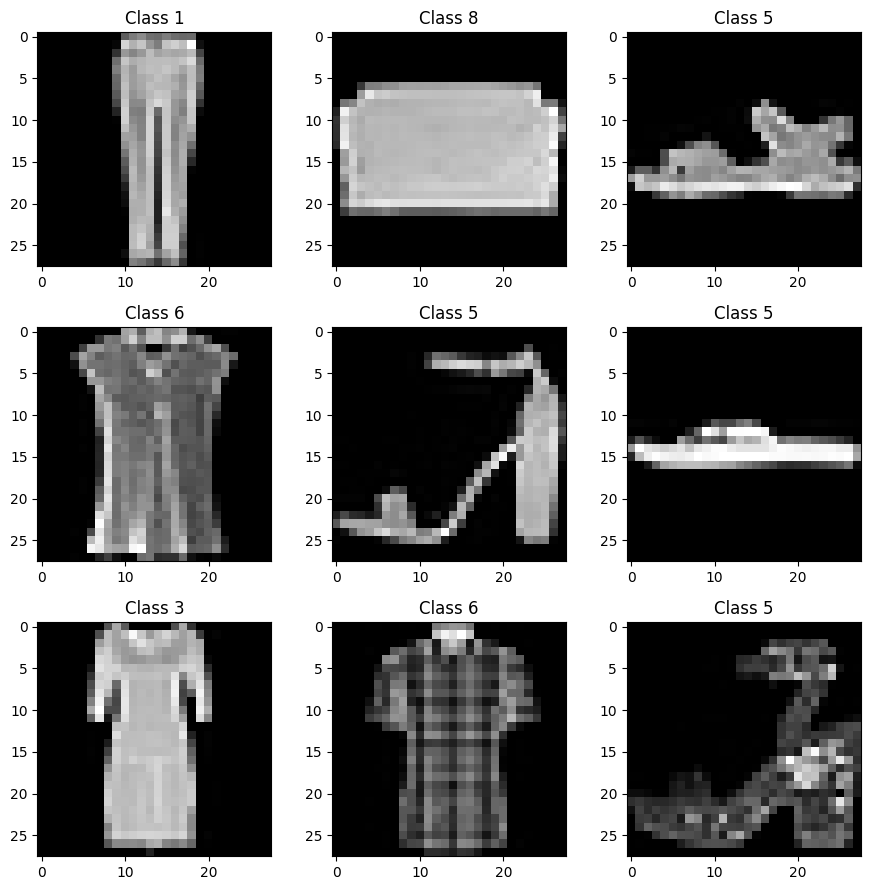

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))

plt.tight_layout()

In this section, we load the Fashion MNIST dataset using the load_data() function provided by fashion_mnist. The data is split into training and testing sets, and we store them in X_train, y_train, X_test, and y_test variables. We then print this data to get a feel for what it looks like, and to test if it worked.

# **Preprocessing the Data**

In [ ]:
# Reshape and normalize the input data
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In this section, we preprocess the data before feeding it to the model. First, we reshape the input data from a 3D array (images) to a 2D array (vectors) using reshape(). Then, we normalize the pixel values by dividing them by 255 to scale them between 0 and 1. Finally, we one-hot encode the labels using to_categorical() from np_utils.

# **Creating the Model Architecture**

In [ ]:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In this section, we create the model architecture using the Sequential class. We add layers to the model using add(). The model consists of three types of layers: Dense, Activation, and Dropout. The Dense layers are fully connected layers, the Activation layers apply activation functions, and the Dropout layers introduce regularization to prevent overfitting. The final layer uses the softmax activation function for multi-class classification.

# **Compiling the Model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.5169 - accuracy: 0.8151 - val_loss: 0.4224 - val_accuracy: 0.8481
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3837 - accuracy: 0.8597 - val_loss: 0.3745 - val_accuracy: 0.8645
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.3487 - accuracy: 0.8712 - val_loss: 0.3905 - val_accuracy: 0.8588
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3284 - accuracy: 0.8785 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.3140 - accuracy: 0.8837 - val_loss: 0.3383 - val_accuracy: 0.8769
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2980 - accuracy: 0.8876 - val_loss: 0.3317 - val_accuracy: 0.8787
Epoch 7/10
469/469 [==============================] - 11s 25ms/step - loss: 0.2845 - accuracy: 0.8939 - val_loss: 0.3382 - val_accuracy:

In this section, we compile the model by specifying the loss function, optimizer, and metrics to be used during training. We use categorical cross-entropy as the loss function, the Adam optimizer, and accuracy as the metric to evaluate the model's performance.

# **Training the Model**

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 0.321147620677948
Test accuracy: 0.8863000273704529


To assess the performance of the trained model, we use the evaluate() function provided by Keras. This function takes the test data (X_test and y_test) as input and returns the test loss and test accuracy as evaluation metrics.

The evaluate() function calculates the loss and accuracy of the model predictions on the test data. The test loss represents the discrepancy between the predicted labels and the true labels in the test dataset. A lower test loss indicates that the model's predictions are closer to the true labels, reflecting better performance.

The test accuracy, on the other hand, provides a measure of how accurately the model classified the test samples. It represents the proportion of correctly classified samples out of the total number of test samples. A higher test accuracy signifies that the model is performing well in correctly predicting the class labels for the unseen data.

By printing the values of test loss and test accuracy, we can observe the quantitative results of the evaluation. These metrics allow us to assess the model's overall performance and determine its efficacy in making accurate predictions on new, unseen data.

Monitoring the test loss and test accuracy is essential for evaluating the model's generalization ability. It helps us validate whether the model has learned meaningful patterns from the training data and can effectively apply those patterns to unseen samples. Furthermore, comparing these metrics with previous results or benchmark models can provide insights into the model's relative performance and identify areas for improvement.

In summary, the code segment calculates and displays the test loss and test accuracy, providing a quantitative assessment of the trained model's performance on the Fashion MNIST test dataset.
# **Results of the Training**

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

With the addition of the code to obtain indices of correctly and incorrectly predicted samples, we can enhance the evaluation section to include a deeper analysis of the model's performance.

After obtaining the predicted classes using np.argmax(model.predict(X_test), axis=-1), we can further examine the model's predictions by identifying the indices where the predicted classes match the true labels (y_test) or where they differ. This allows us to gain insights into specific samples that the model correctly or incorrectly classified.

By separating the correctly and incorrectly predicted indices using np.nonzero(), we can investigate these samples in more detail. This analysis provides valuable information about the specific instances where the model excelled or struggled in its predictions, shedding light on potential challenges or areas for improvement.

For instance, you can inspect the images at the indices of correct_indices and incorrect_indices, visualize them using matplotlib.pyplot, and compare the predicted labels against the true labels. This examination facilitates understanding the types of samples the model tends to get right or wrong, potentially revealing patterns or areas where the model may need adjustments.

In conclusion, by incorporating the code to identify correct and incorrect predictions, we can conduct a more comprehensive evaluation of the model, going beyond overall accuracy and loss. This detailed analysis enables us to gain insights into the model's performance at the individual sample level, facilitating fine-tuning and improvements to achieve higher accuracy and reliability in real-world scenarios.
# **Correct Predictions**

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

# **Incorrect Predictions**

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()